In [1]:
%matplotlib inline

In [2]:
from framed import load_cbmodel
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('white')

### Load models

In [3]:
organisms = ['B. uniformis', 'R. bromii', 'B. wexlerae', 'E. rectale', 'F. saccharivorans']

gut_normal = {
    'B. uniformis': ('../models/gut_normal/ERR260255_bin.24.s.xml', 'cobra'),
    'R. bromii': ('../models/gut_normal/ERR260255_bin.7.p.xml', 'cobra'),
    'B. wexlerae': ('../models/gut_normal/ERR260255_bin.9.s.xml', 'cobra'),
    'E. rectale': ('../models/gut_normal/ERR260255_bin.19.p.xml', 'cobra'),
    'F. saccharivorans': ('../models/gut_normal/ERR260255_bin.14.p.xml', 'cobra')
}

gut_impaired = {
    'B. uniformis': ('../models/gut_impaired/ERR260172_bin.10.p.xml', 'cobra'),
    'R. bromii': ('../models/gut_impaired/ERR260172_bin.44.p.xml', 'cobra'),
    'B. wexlerae': ('../models/gut_impaired/ERR260172_bin.7.s.xml', 'cobra'),
    'E. rectale': ('../models/gut_impaired/ERR260172_bin.31.s.xml', 'cobra'),
    'F. saccharivorans': ('../models/gut_impaired/ERR260172_bin.34.p.xml', 'cobra')
}

gut_t2d = {
    'B. uniformis': ('../models/gut_t2d/ERR260140_bin.3.s.xml', 'cobra'),
    'R. bromii': ('../models/gut_t2d/ERR260140_bin.19.p.xml', 'cobra'),
    'B. wexlerae': ('../models/gut_t2d/ERR260140_bin.13.s.xml', 'cobra'),
    'E. rectale': ('../models/gut_t2d/ERR260140_bin.11.s.xml', 'cobra'),
    'F. saccharivorans': ('../models/gut_t2d/ERR260140_bin.10.p.xml', 'cobra')
}

gut_refseq = {
    'B. uniformis': ('../models/gut_refseq/GCF_018292165.1_ASM1829216v1_protein.xml', 'cobra'),
    'R. bromii': ('../models/gut_refseq/GCF_002834225.1_ASM283422v1_protein.xml', 'cobra'),
    'B. wexlerae': ('../models/gut_refseq/GCF_018785545.1_ASM1878554v1_protein.xml', 'cobra'),
    'E. rectale': ('../models/gut_refseq/GCF_000020605.1_ASM2060v1_protein.xml', 'cobra'),
    'F. saccharivorans': ('../models/gut_refseq/GCF_015557635.1_ASM1555763v1_protein.xml', 'cobra')
}


In [5]:
for label, (model_file, flavor) in gut_normal.items():
    gut_normal[label] =  load_cbmodel(model_file, flavor=flavor)

for label, (model_file, flavor) in gut_impaired.items():
    gut_impaired[label] =  load_cbmodel(model_file, flavor=flavor)
    
for label, (model_file, flavor) in gut_t2d.items():
    gut_t2d[label] =  load_cbmodel(model_file, flavor=flavor)

for label, (model_file, flavor) in gut_refseq.items():
    gut_refseq[label] =  load_cbmodel(model_file, flavor=flavor)

### Summarize data

In [6]:
data = []
spontaneous = {'G_spontaneous', 'G_Unknown', 'G_s0001', 'G_NoAssignment'} 

for organism in organisms:
    
    model = gut_normal[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'gut_normal', n_genes, n_enzrxns, n_mets))
    
    model = gut_impaired[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'gut_impaired', n_genes, n_enzrxns, n_mets))
    
    model = gut_t2d[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'gut_t2d', n_genes, n_enzrxns, n_mets))
    
    model = gut_refseq[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'gut_refseq', n_genes, n_enzrxns, n_mets))
    
df = pd.DataFrame(data, columns=['Organism', 'Source', 'Genes', 'Reactions', 'Metabolites'])

<ipython-input-19-fe4165c82074>:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)


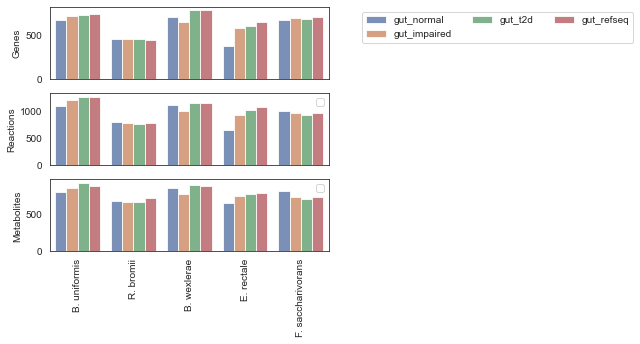

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(5, 4.5))

sns.barplot(x="Organism", y="Genes", hue="Source", data=df, palette='deep', ax=ax1, alpha=0.8)
ax1.set_xlabel('')
legend_handles, legend_text = ax1.get_legend_handles_labels()
ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)


sns.barplot(x="Organism", y="Reactions", hue="Source", data=df, palette='deep', ax=ax2, alpha=0.8)
ax2.get_legend().set_title('')
ax2.set_xlabel('')
ax2.legend([])

res = sns.barplot(x="Organism", y="Metabolites", hue="Source", data=df, palette='deep', ax=ax3, alpha=0.8)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_xlabel('')
ax3.legend([])

plt.savefig('../plots/model_summary/gut.png', dpi=300, bbox_inches='tight')

### Move on to [exercise 3](https://github.com/franciscozorrilla/SymbNET/blob/main/scripts/3.run_smetana_detailed_interactions.md)